In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

X = df[feature_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape of scaled data: {X_scaled.shape}")


Shape of scaled data: (150, 4)


### K-Means : Elbow and Silhouette 

In [7]:
n_clusters = 2

print(f"Performing K-means clustering with k={n_clusters}...")

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

Performing K-means clustering with k=2...


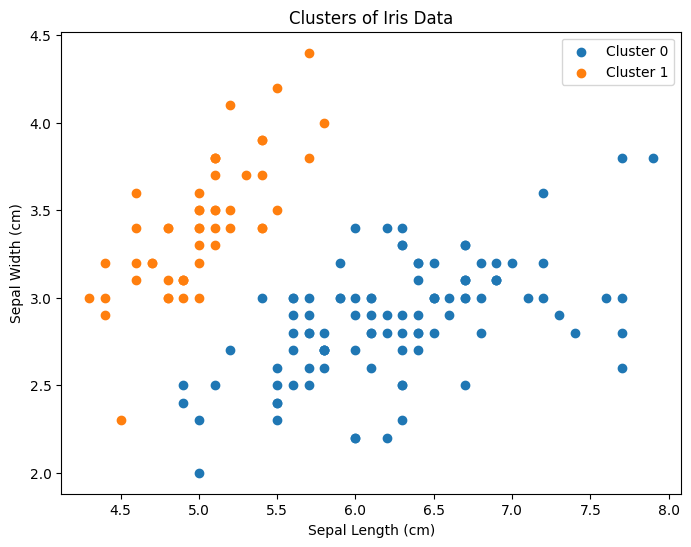

In [8]:
import matplotlib.pyplot as plt

df['Cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], label=f'Cluster {cluster}')

plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

Calculating WCSS for k from 1 to 10...


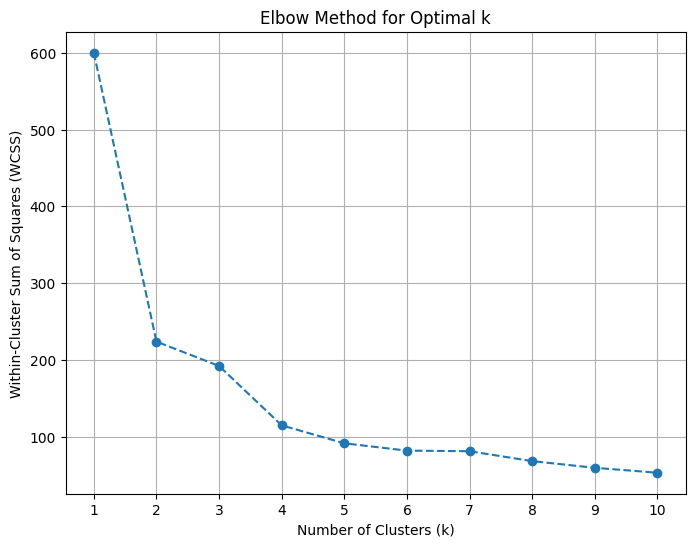

In [9]:
wcss = []
max_k = 10 

print(f"Calculating WCSS for k from 1 to {max_k}...")
for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()



Calculating Silhouette Scores for k from 2 to 10...
  k = 2: Silhouette Score = 0.5802
  k = 3: Silhouette Score = 0.4787
  k = 4: Silhouette Score = 0.3872
  k = 5: Silhouette Score = 0.3473
  k = 6: Silhouette Score = 0.3362
  k = 7: Silhouette Score = 0.2686
  k = 8: Silhouette Score = 0.3157
  k = 9: Silhouette Score = 0.2991
  k = 10: Silhouette Score = 0.3211


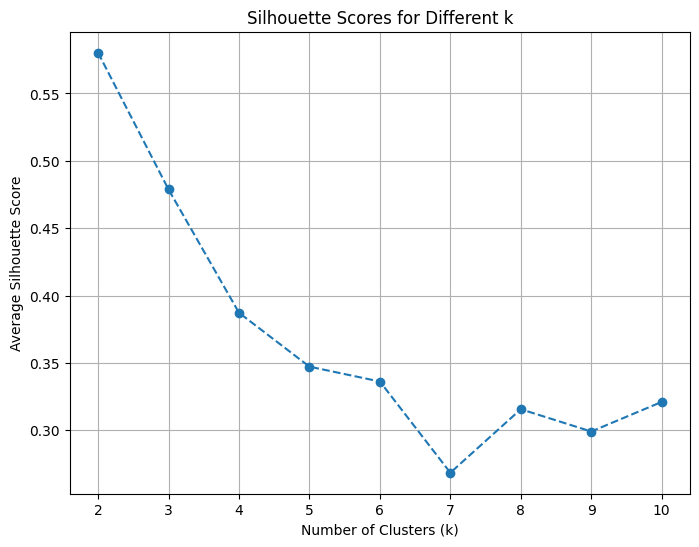

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

min_k_silhouette = 2 
max_k_silhouette = 10

print(f"\nCalculating Silhouette Scores for k from {min_k_silhouette} to {max_k_silhouette}...")
for i in range(min_k_silhouette, max_k_silhouette + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores.append(score)
    print(f"  k = {i}: Silhouette Score = {score:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(range(min_k_silhouette, max_k_silhouette + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(range(min_k_silhouette, max_k_silhouette + 1))
plt.grid(True)
plt.show()



### Hierarchical Clustering

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt 


n_clusters_hierarchical = 3 # 
print(f"Performing Hierarchical (Agglomerative) clustering with n_clusters={n_clusters_hierarchical}...")

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
hierarchical_labels = agg_clustering.fit_predict(X_scaled)

df['Hierarchical_Cluster'] = hierarchical_labels

print("Hierarchical clustering complete. 'Hierarchical_Cluster' column added.")
print(df[['Species', 'Cluster', 'Hierarchical_Cluster']].head())


Performing Hierarchical (Agglomerative) clustering with n_clusters=3...
Hierarchical clustering complete. 'Hierarchical_Cluster' column added.
       Species  Cluster  Hierarchical_Cluster
0  Iris-setosa        1                     1
1  Iris-setosa        1                     1
2  Iris-setosa        1                     1
3  Iris-setosa        1                     1
4  Iris-setosa        1                     1


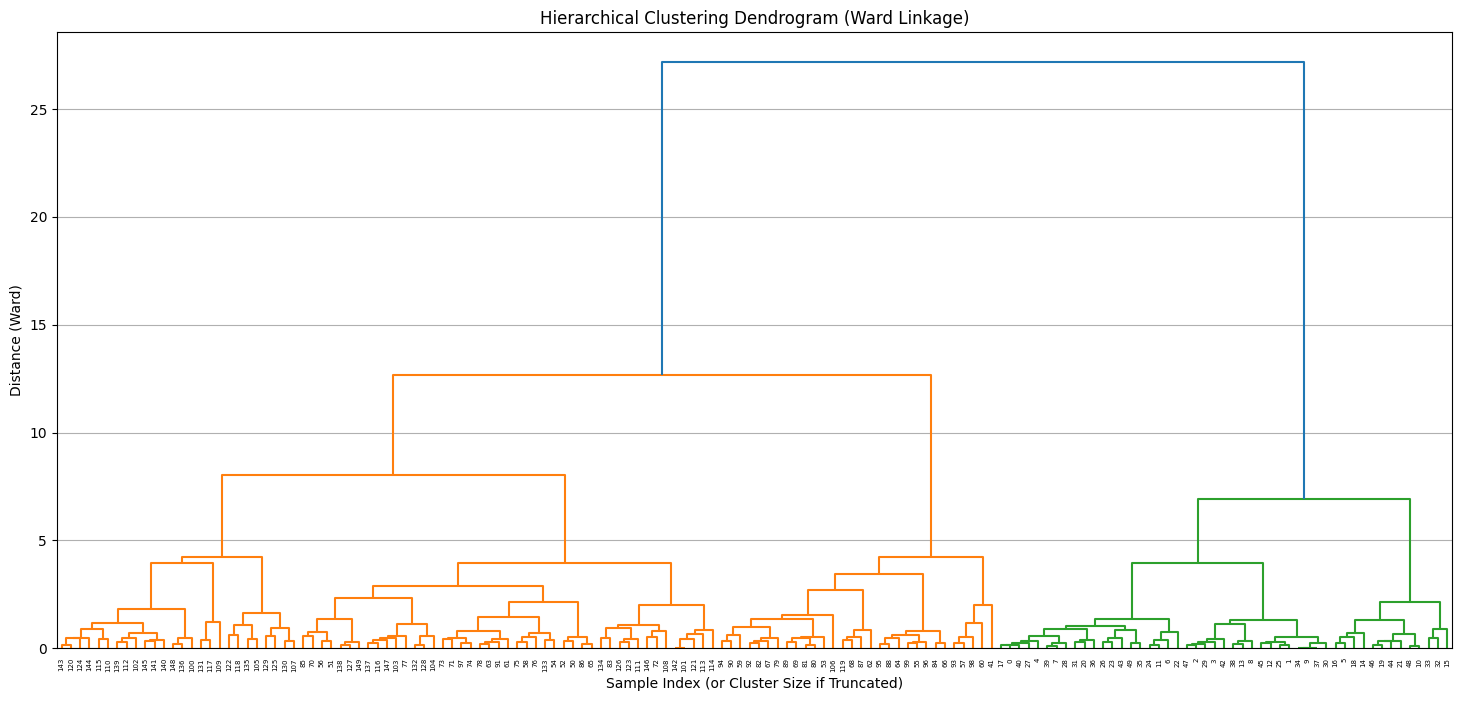

In [16]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(18, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index (or Cluster Size if Truncated)')
plt.ylabel('Distance (Ward)')
plt.grid(axis='y')
plt.show()


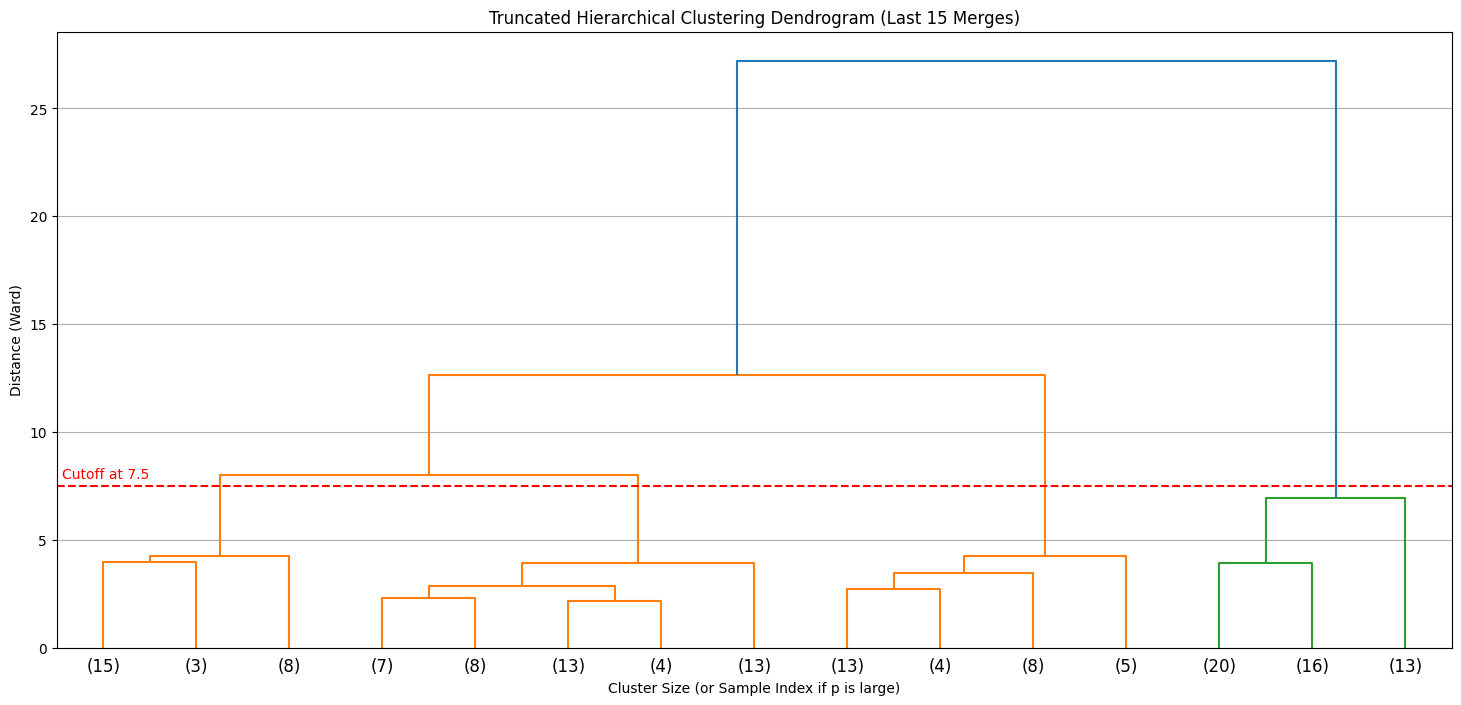

With a distance cutoff around 7.5, you'd expect to see a certain number of clusters (count vertical lines crossed).


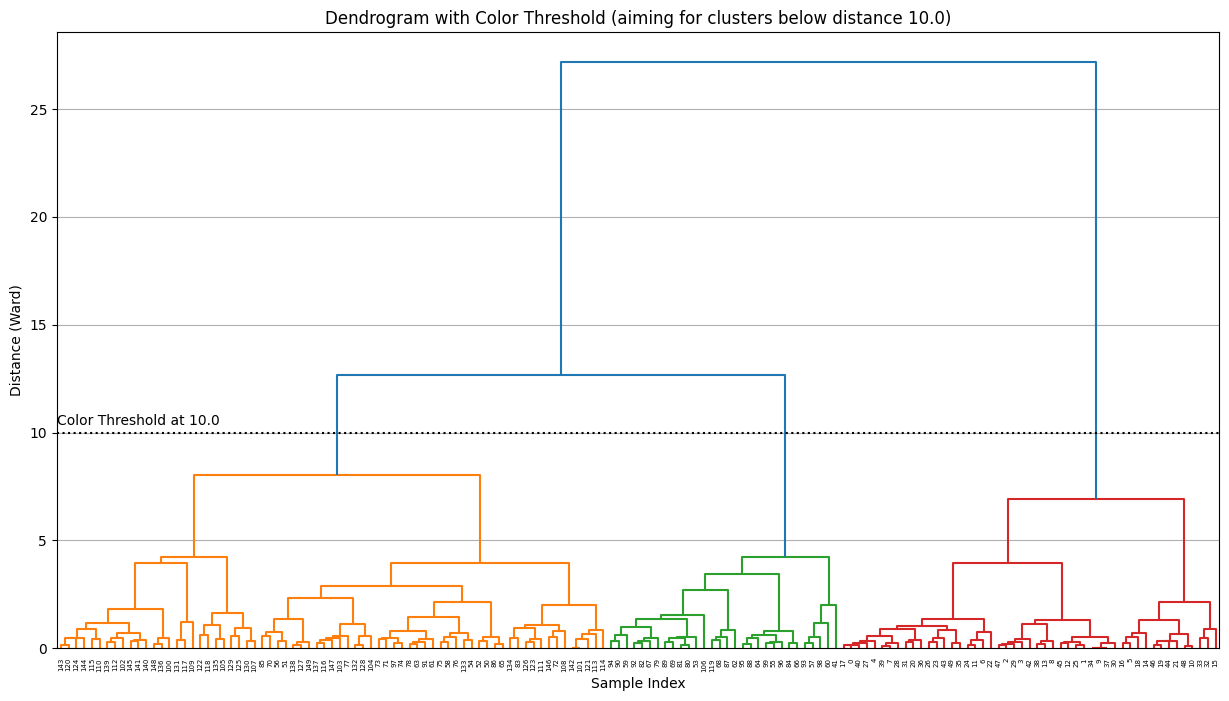

In [19]:
plt.figure(figsize=(18, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode='lastp',  
            p=15)    

plt.title('Truncated Hierarchical Clustering Dendrogram (Last 15 Merges)')
plt.xlabel('Cluster Size (or Sample Index if p is large)')
plt.ylabel('Distance (Ward)')


plt.axhline(y=cutoff_distance_example, color='r', linestyle='--')
plt.text(0.5, cutoff_distance_example + 0.2, f'Cutoff at {cutoff_distance_example}', color='red', va='bottom', ha='left')
plt.grid(axis='y')
plt.show()

print(f"With a distance cutoff around {cutoff_distance_example}, you'd expect to see a certain number of clusters (count vertical lines crossed).")

desired_clusters = 3
color_thresh_example = 10.0

plt.figure(figsize=(15, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=color_thresh_example)

plt.title(f'Dendrogram with Color Threshold (aiming for clusters below distance {color_thresh_example})')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.axhline(y=color_thresh_example, color='k', linestyle=':')
plt.text(0.5, color_thresh_example + 0.2, f'Color Threshold at {color_thresh_example}', color='black', va='bottom', ha='left')
plt.grid(axis='y')
plt.show()
